### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

### Collect Data

In [3]:
#!pip install Keras

In [4]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [5]:
import keras

Using TensorFlow backend.


In [6]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.fashion_mnist.load_data()

In [7]:
print(ytest[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [8]:
y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [9]:
print(y_train.shape)
print('First 5 examples now are: ', y_train[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

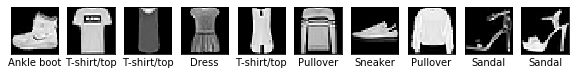

In [11]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap='gray')
    plt.xlabel(class_names[ytrain[i]])
plt.show()

In [12]:
xtrain[0].shape

(28, 28)

In [13]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64

In [14]:
xtest.shape

(10000, 28, 28)

In [15]:
#Represent Training & Testing samples suitable for #tensorflow backend
#x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
#x_test=xtest.reshape(xtest.shape[0],784).astype('float32')

In [16]:
# convert from integers to floats
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [17]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [18]:
xtest[0].shape

(28, 28)

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [19]:
from tensorflow.keras.layers import Flatten
# Initialize the constructor

model = Sequential()

# Define model architecture

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(150, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [21]:
xtrain.shape,xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
xtrain.size

47040000

### Execute the model using model.fit()

In [23]:
epochs = 10
batch_size = 32 

history = model.fit(xtrain, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
loss,accuracy  = model.evaluate(xtest, y_test, verbose=False)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 12s 216us/sample - loss: 0.7650 - accuracy: 0.7501 - val_loss: 0.5973 - val_accuracy: 0.7895
Epoch 2/10
54000/54000 [==============================] - 10s 179us/sample - loss: 0.5227 - accuracy: 0.8224 - val_loss: 0.4971 - val_accuracy: 0.8250
Epoch 3/10
54000/54000 [==============================] - 10s 186us/sample - loss: 0.4747 - accuracy: 0.8361 - val_loss: 0.4707 - val_accuracy: 0.8322
Epoch 4/10
54000/54000 [==============================] - 8s 155us/sample - loss: 0.4496 - accuracy: 0.8437 - val_loss: 0.4356 - val_accuracy: 0.8437
Epoch 5/10
54000/54000 [==============================] - 7s 123us/sample - loss: 0.4301 - accuracy: 0.8506 - val_loss: 0.4258 - val_accuracy: 0.8513
Epoch 6/10
54000/54000 [==============================] - 6s 119us/sample - loss: 0.4171 - accuracy: 0.8547 - val_loss: 0.4330 - val_accuracy: 0.8447
Epoch 7/10
54000/54000 [========================

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [25]:
from tensorflow.keras.layers import BatchNormalization

In [33]:
model_n = Sequential()

# Define model architecture

model_n.add(Flatten(input_shape=(28, 28)))
model_n.add(Dense(100, activation ='relu'))
model_n.add(BatchNormalization())
model_n.add(Dense(10,activation='softmax'))

In [34]:
model_n.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [35]:
epochs = 20
batch_size = 32 

history = model_n.fit(xtrain, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
loss,accuracy  = model_n.evaluate(xtest, y_test, verbose=False)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 13s 237us/sample - loss: 0.5691 - accuracy: 0.8030 - val_loss: 0.4445 - val_accuracy: 0.8385
Epoch 2/20
54000/54000 [==============================] - 11s 201us/sample - loss: 0.4359 - accuracy: 0.8462 - val_loss: 0.4227 - val_accuracy: 0.8485
Epoch 3/20
54000/54000 [==============================] - 9s 167us/sample - loss: 0.4000 - accuracy: 0.8595 - val_loss: 0.3876 - val_accuracy: 0.8615
Epoch 4/20
54000/54000 [==============================] - 7s 131us/sample - loss: 0.3771 - accuracy: 0.8671 - val_loss: 0.4076 - val_accuracy: 0.8483
Epoch 5/20
54000/54000 [==============================] - 7s 131us/sample - loss: 0.3577 - accuracy: 0.8719 - val_loss: 0.3665 - val_accuracy: 0.8687
Epoch 6/20
54000/54000 [==============================] - 10s 187us/sample - loss: 0.3468 - accuracy: 0.8772 - val_loss: 0.3751 - val_accuracy: 0.8650
Epoch 7/20
54000/54000 [========================

### Execute the model

[0.8385, 0.8485, 0.8615, 0.84833336, 0.86866665, 0.865, 0.86083335, 0.8696667, 0.86116666, 0.87766665, 0.86866665, 0.86216664, 0.8703333, 0.879, 0.874, 0.87583333, 0.87483335, 0.87133336, 0.8731667, 0.877]
[0.8030185, 0.8462222, 0.85948145, 0.8670741, 0.87192595, 0.8772407, 0.87953705, 0.88283336, 0.8862037, 0.88831484, 0.8930926, 0.89364815, 0.89775926, 0.8996852, 0.9006111, 0.9032222, 0.9038148, 0.9053889, 0.90605557, 0.90966666]


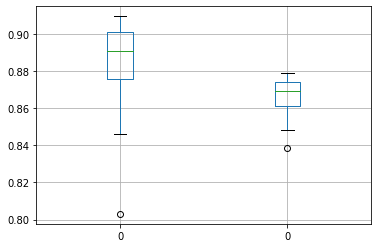

In [36]:
print(history.history['val_accuracy'])
print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [37]:
loss, acc = model_n.evaluate(xtest, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.874
Loss: 0.357


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [38]:
# Initialize the constructor

model_lr = Sequential()

# Define model architecture
model_lr.add(Flatten(input_shape=(28, 28)))
model_lr.add(Dense(100, activation ='relu'))
model_lr.add(Dense(10,activation='softmax'))

In [39]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001)

In [40]:
model_lr.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [41]:
epochs = 10
batch_size = 32


history_lr = model_lr.fit(xtrain, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
loss,accuracy  = model_lr.evaluate(xtest, y_test, verbose=False)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 187us/sample - loss: 1.5417 - accuracy: 0.5668 - val_loss: 1.0788 - val_accuracy: 0.6952
Epoch 2/10
54000/54000 [==============================] - 9s 165us/sample - loss: 0.9470 - accuracy: 0.7061 - val_loss: 0.8353 - val_accuracy: 0.7345
Epoch 3/10
54000/54000 [==============================] - 9s 171us/sample - loss: 0.7964 - accuracy: 0.7411 - val_loss: 0.7392 - val_accuracy: 0.7567
Epoch 4/10
54000/54000 [==============================] - 9s 170us/sample - loss: 0.7238 - accuracy: 0.7635 - val_loss: 0.6853 - val_accuracy: 0.7760
Epoch 5/10
54000/54000 [==============================] - 9s 162us/sample - loss: 0.6776 - accuracy: 0.7796 - val_loss: 0.6485 - val_accuracy: 0.7817
Epoch 6/10
54000/54000 [==============================] - 8s 141us/sample - loss: 0.6440 - accuracy: 0.7890 - val_loss: 0.6214 - val_accuracy: 0.7935
Epoch 7/10
54000/54000 [==========================

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [42]:
# Initialize the constructor

model_lr1 = Sequential()

# Define model architecture

model_lr1.add(Flatten(input_shape=(28, 28)))
model_lr1.add(Dense(100, activation ='sigmoid'))
model_lr1.add(Dense(100, activation ='sigmoid'))
model_lr1.add(Dense(10,activation='softmax'))

# Review model

In [43]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.03)
model_lr1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Run the model

In [44]:
epochs = 10
batch_size = 32

history_lr1 = model_lr1.fit(xtrain, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
loss,accuracy  = model_lr1.evaluate(xtest, y_test, verbose=False)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 170us/sample - loss: 1.5295 - accuracy: 0.5315 - val_loss: 0.9755 - val_accuracy: 0.6967
Epoch 2/10
54000/54000 [==============================] - 8s 152us/sample - loss: 0.8137 - accuracy: 0.7204 - val_loss: 0.6943 - val_accuracy: 0.7497
Epoch 3/10
54000/54000 [==============================] - 8s 155us/sample - loss: 0.6510 - accuracy: 0.7613 - val_loss: 0.6069 - val_accuracy: 0.7728
Epoch 4/10
54000/54000 [==============================] - 8s 149us/sample - loss: 0.5829 - accuracy: 0.7879 - val_loss: 0.5555 - val_accuracy: 0.7983
Epoch 5/10
54000/54000 [==============================] - 9s 161us/sample - loss: 0.5391 - accuracy: 0.8068 - val_loss: 0.5206 - val_accuracy: 0.8135
Epoch 6/10
54000/54000 [==============================] - 9s 173us/sample - loss: 0.5073 - accuracy: 0.8193 - val_loss: 0.4970 - val_accuracy: 0.8263
Epoch 7/10
54000/54000 [===========================

In [45]:
predictions = model_n.predict(xtest)

In [46]:
predictions[0]

array([1.82410313e-05, 7.75863955e-05, 2.60119559e-04, 1.23554055e-05,
       2.79741544e-05, 1.37713710e-02, 1.92216794e-05, 5.16990619e-03,
       2.48138706e-04, 9.80395019e-01], dtype=float32)

In [47]:
np.argmax(predictions[0])

9

In [48]:
ytest[0]

9

In [49]:
y_pred = []
for val in predictions:
    y_pred.append(np.argmax(val))
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[781   2  15  21   8   1 165   0   7   0]
 [  4 971   2  18   2   0   2   0   1   0]
 [ 15   2 795  11 101   0  70   0   6   0]
 [ 25  10  13 855  55   0  36   1   5   0]
 [  1   1 101  20 801   0  71   0   5   0]
 [  0   0   0   1   0 957   0  19   2  21]
 [ 96   0  81  17  77   0 716   0  13   0]
 [  0   0   0   0   0  29   0 936   0  35]
 [  4   0   3   5   5   5   9   4 965   0]
 [  0   0   0   0   0   6   1  32   0 961]]


In [50]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.79      0.80      0.79      1000
           3       0.90      0.85      0.88      1000
           4       0.76      0.80      0.78      1000
           5       0.96      0.96      0.96      1000
           6       0.67      0.72      0.69      1000
           7       0.94      0.94      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

